<a href="https://colab.research.google.com/github/poojya100/6thSem-ML-Lab/blob/main/1BM23CS303_Lab3_Linear_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Linear Regression With library

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
Predicted per capita income for 2020: 41288.69409441762


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


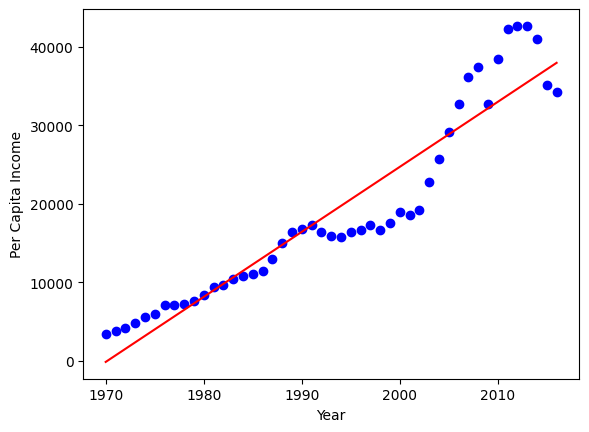

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("canada_per_capita_income.csv")

# Display first few rows
print(df.head())

# Prepare data
X = df[['year']]      # Independent variable
y = df['per capita income (US$)']  # Dependent variable

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Predict income for year 2020
prediction = model.predict([[2020]])
print("Predicted per capita income for 2020:", prediction[0])

# Optional: Visualize
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Year")
plt.ylabel("Per Capita Income")
plt.show()


Without Library

In [3]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("canada_per_capita_income.csv")

# Prepare data
X = df['year'].values
y = df['per capita income (US$)'].values

# Add bias term (column of 1s)
X_b = np.c_[np.ones(len(X)), X]

# Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predict for 2020
year_2020 = np.array([1, 2020])
prediction = year_2020.dot(theta)

print("Predicted per capita income for 2020:", prediction)


Predicted per capita income for 2020: 41288.694094381295


2. With Library

Predicted salary for 12 years experience: 139980.88923969213


/tmp/ipython-input-1372265028.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsExperience'].fillna(df['YearsExperience'].mean(), inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


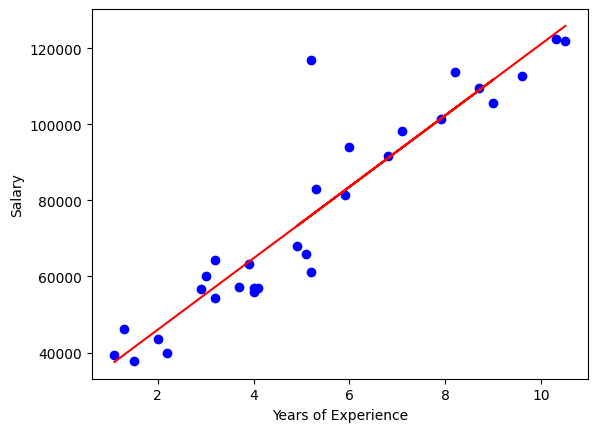

In [5]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("salary.csv")

# Fill missing values with mean
df['YearsExperience'].fillna(df['YearsExperience'].mean(), inplace=True)

# Prepare data
X = df[['YearsExperience']]
y = df['Salary']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
prediction = model.predict([[12]])
print("Predicted salary for 12 years experience:", prediction[0])

# Visualization
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


Without Library

Predicted salary for 12 years experience: 139980.88923969245


/tmp/ipython-input-601043415.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsExperience'].fillna(df['YearsExperience'].mean(), inplace=True)


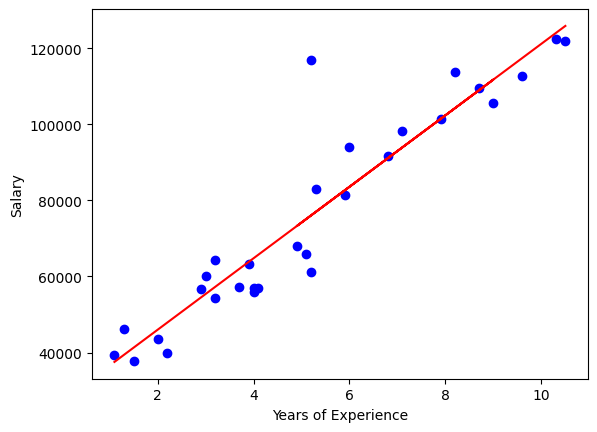

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("salary.csv")

# Fill missing values with mean
df['YearsExperience'].fillna(df['YearsExperience'].mean(), inplace=True)

# Prepare data
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

# Add bias term (column of 1s)
X_b = np.c_[np.ones((len(X), 1)), X]

# Normal Equation (using pseudo-inverse for safety)
theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

# Predict salary for 12 years experience
experience_12 = np.array([[1, 12]])   # 1 for bias
prediction = experience_12 @ theta

print("Predicted salary for 12 years experience:", prediction[0])

# Visualization
plt.scatter(X, y, color='blue')
plt.plot(X, X_b @ theta, color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


Multiple Linear Regression

1.With Library

In [21]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("hiring.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Convert experience words to numbers
df["experience"] = df["experience"].replace({
    "zero":0,"one":1,"two":2,"three":3,"four":4,
    "five":5,"six":6,"seven":7,"eight":8,
    "nine":9,"ten":10,"eleven":11,"twelve":12
})

# Convert all relevant columns to numeric
cols = ["experience", "test_score(out of 10)",
        "interview_score(out of 10)", "salary($)"]

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Features and target
X = df[["experience", "test_score(out of 10)",
        "interview_score(out of 10)"]].values.astype(float)

y = df["salary($)"].values.astype(float)

# Add bias
X_b = np.c_[np.ones((len(X),1)), X]

# Normal Equation
theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

# Predictions
candidate1 = np.array([1,2,9,6])
candidate2 = np.array([1,12,10,10])

pred1 = candidate1 @ theta
pred2 = candidate2 @ theta

print("Predicted salary (2yr,9,6):", pred1)
print("Predicted salary (12yr,10,10):", pred2)


Predicted salary (2yr,9,6): 47056.91056910658
Predicted salary (12yr,10,10): 88227.64227642145


/tmp/ipython-input-2912235685.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["experience"] = df["experience"].replace({


Without Library

In [23]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("hiring.csv")

# Strip column names
df.columns = df.columns.str.strip()

# Convert experience column to numeric if it contains text like 'two', 'three'
exp_map = {
    "zero":0,"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,
    "seven":7,"eight":8,"nine":9,"ten":10,"eleven":11,"twelve":12
}
if df['experience'].dtype == object:
    df['experience'] = df['experience'].replace(exp_map)

# Convert all relevant columns to numeric
for col in ['experience', 'test_score(out of 10)', 'interview_score(out of 10)', 'salary($)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert strings to NaN if any

# Fill missing numeric values with median
df['experience'].fillna(df['experience'].median(), inplace=True)
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)
df['interview_score(out of 10)'].fillna(df['interview_score(out of 10)'].median(), inplace=True)
df['salary($)'].fillna(df['salary($)'].median(), inplace=True)

# Prepare features and target
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values.astype(float)
y = df['salary($)'].values.astype(float)

# Add bias term
X_b = np.c_[np.ones((len(X),1)), X]

# Compute coefficients using Normal Equation (pseudo-inverse is safer)
theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

# Predictions
candidate1 = np.array([1, 2, 9, 6])
candidate2 = np.array([1, 12, 10, 10])

pred1 = candidate1 @ theta
pred2 = candidate2 @ theta

print("Predicted salary (2yr,9,6):", pred1)
print("Predicted salary (12yr,10,10):", pred2)


Predicted salary (2yr,9,6): 47056.91056910658
Predicted salary (12yr,10,10): 88227.64227642145


/tmp/ipython-input-2672453528.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience'] = df['experience'].replace(exp_map)
/tmp/ipython-input-2672453528.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience'].fillna(df['experience'].median(), inplace=True)
/tmp/ipython-inp

2.With Library

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("1000_Companies.csv")

# One Hot Encoding for State
df = pd.get_dummies(df, columns=['State'], drop_first=True)

# Features and target
X = df.drop('Profit', axis=1)
y = df['Profit']

# Train model
model = LinearRegression()
model.fit(X, y)

# Prepare new input
# IMPORTANT: Column order must match training data
new_data = pd.DataFrame([[91694.48, 515841.3, 11931.24, 0, 1]],
                        columns=X.columns)

prediction = model.predict(new_data)

print("Predicted Profit:", prediction[0])


Predicted Profit: 511115.0737557667


Without Library

In [15]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("1000_Companies.csv")

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Check dataset info
print(df.info())

# One Hot Encoding for State
df = pd.get_dummies(df, columns=['State'], drop_first=True)

# Convert ALL columns to numeric (important fix)
df = df.apply(pd.to_numeric)

# Separate features and target
X = df.drop('Profit', axis=1).values
y = df['Profit'].values

# Convert to float explicitly
X = X.astype(float)
y = y.astype(float)

# Add bias term
X_b = np.c_[np.ones((len(X), 1)), X]

# Use pseudo-inverse (safer than inv)
theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

# Check column order
print("Feature order:\n", df.drop('Profit', axis=1).columns)

# IMPORTANT: Match this order exactly
new_input = np.array([[91694.48, 515841.3, 11931.24, 0, 1]])

# Add bias
new_input_b = np.c_[np.ones((1,1)), new_input]

prediction = new_input_b @ theta

print("Predicted Profit:", prediction[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB
None
Feature order:
 Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'],
      dtype='object')
Predicted Profit: 511115.07886798534
